In [23]:
from cebra import CEBRA
from scipy.io import loadmat
import numpy as np

hypothalamus_data = loadmat('hypothalamus_calcium_imaging_remedios_et_al.mat')

neural_data=hypothalamus_data['neural_data']
attack_vector=hypothalamus_data['attack_vector']
sex_vector=hypothalamus_data['sex_vector']

#Decode attack vector
#Draw the train and test split
#3blue1brown

def train_test_split(hypothalamus_data):
    
    neural_data = hypothalamus_data['neural_data']
    attack_vector = hypothalamus_data['attack_vector']
    sex_vector = hypothalamus_data['sex_vector']
    
    #Get and split data of female cage mate
    female_mate = np.where(sex_vector.flatten()==1)[0]
    male_mate = np.where(sex_vector.flatten()==0)[0]
    n_train_female = female_mate.shape[0]//2
    male_start=male_mate[0]
    #The split point between train and test set within
    #the set of female
    split_point_f = female_mate[n_train_female]
    neural_data_test_female = neural_data.T[:split_point_f]
    neural_data_train_female = neural_data.T[split_point_f:male_start]
    sex_vector_train_female = sex_vector.flatten()[split_point_f:male_start].reshape(-1,1)
    sex_vector_test_female = sex_vector.flatten()[:split_point_f].reshape(-1,1)

    #Get and split data of male cage mate
    n_train_male = male_mate.shape[0]//2
    split_point_m= male_mate[n_train_male]
    neural_data_train_male=neural_data.T[male_start:split_point_m]
    neural_data_test_male=neural_data.T[split_point_m:]
    sex_vector_train_male = sex_vector.flatten()[male_start:split_point_m].reshape(-1,1)
    sex_vector_test_male = sex_vector.flatten()[split_point_m:].reshape(-1,1)
    
    #Concatenating train and test from male and female cage mates
    neural_data_train=np.vstack((neural_data_train_female,neural_data_train_male))
    neural_data_test=np.vstack((neural_data_test_female,neural_data_test_male))
    sex_vector_train=np.vstack((sex_vector_train_female,sex_vector_train_male))
    sex_vector_test=np.vstack((sex_vector_test_female,sex_vector_test_male))
    
    print('Data shape: ', neural_data.shape)
    print('Training set shape: ', neural_data_train.shape)
    print('Test set shape: ', neural_data_test.shape)
    print('Sex vector training set shape: ', sex_vector_train)
    
    return neural_data_train, neural_data_test, sex_vector_train, sex_vector_test

neural_data_train, neural_data_test, sex_vector_train, sex_vector_test = train_test_split(hypothalamus_data)


cebra_model = CEBRA(
    model_architecture = "offset10-model",
    batch_size = 1024,
    temperature_mode="auto",
    learning_rate = 0.001,
    max_iterations = 100,
    time_offsets = 10,
    output_dimension = 3,
    device = "cuda_if_available",
    verbose = False
)

cebra_model.fit(neural_data_train)

Data shape:  (115, 18561)
Training set shape:  (9280, 115)
Test set shape:  (9281, 115)
Sex vector training set shape:  [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


CEBRA(batch_size=1024, learning_rate=0.001, max_iterations=100,
      model_architecture='offset10-model', output_dimension=3,
      temperature_mode='auto', time_offsets=10)

<IPython.core.display.Javascript object>


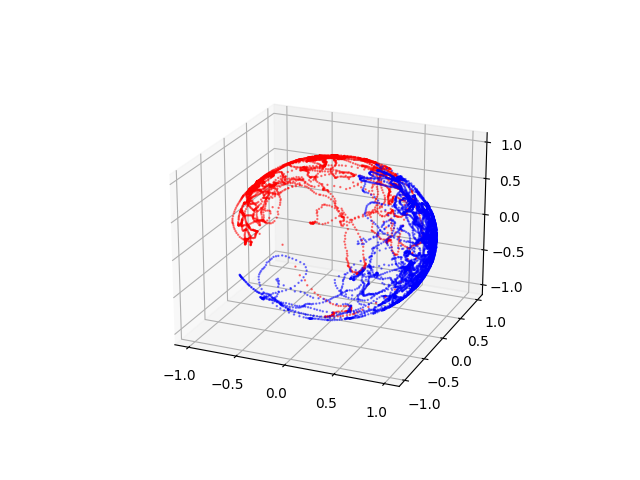

In [25]:
import cebra
import matplotlib.pyplot as plt

embedding=cebra_model.transform(neural_data_test)
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
embedding1 = embedding[:,0]
embedding2 = embedding[:,1]
embedding3 = embedding[:,2]

ax.scatter3D(embedding1, embedding2, embedding3,c=sex_vector_test,cmap='bwr',alpha=0.5,s=0.5);
plt.show()


In [13]:
print(embedding)

[[ 0.48992032  0.84909397  0.19752823]
 [ 0.49359456  0.85179085 -0.17554711]
 [ 0.4518795   0.76893044 -0.45227307]
 ...
 [-0.96194953  0.23288971 -0.14288269]
 [-0.9494223   0.29872638 -0.09674567]
 [-0.92519975  0.36640105  0.09877135]]
